## **Fixação Agrupamento**

In [66]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao_2025/refs/heads/main/dados/fixacao/mall_customers.csv' -O 'mall_customers.csv'

In [67]:
# Bibliotecas
# Manip. dados
import pandas as pd
import numpy as np

# DataViz:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modelagem:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [68]:
dados = pd.read_csv('mall_customers.csv')
dados.head()

,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
dados.shape

(200, 5)

In [70]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      200 non-null    int64 
 1   gender  200 non-null    object
 2   age     200 non-null    int64 
 3   income  200 non-null    int64 
 4   score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [71]:
dados.isna().sum()

,0
id,0
gender,0
age,0
income,0
score,0


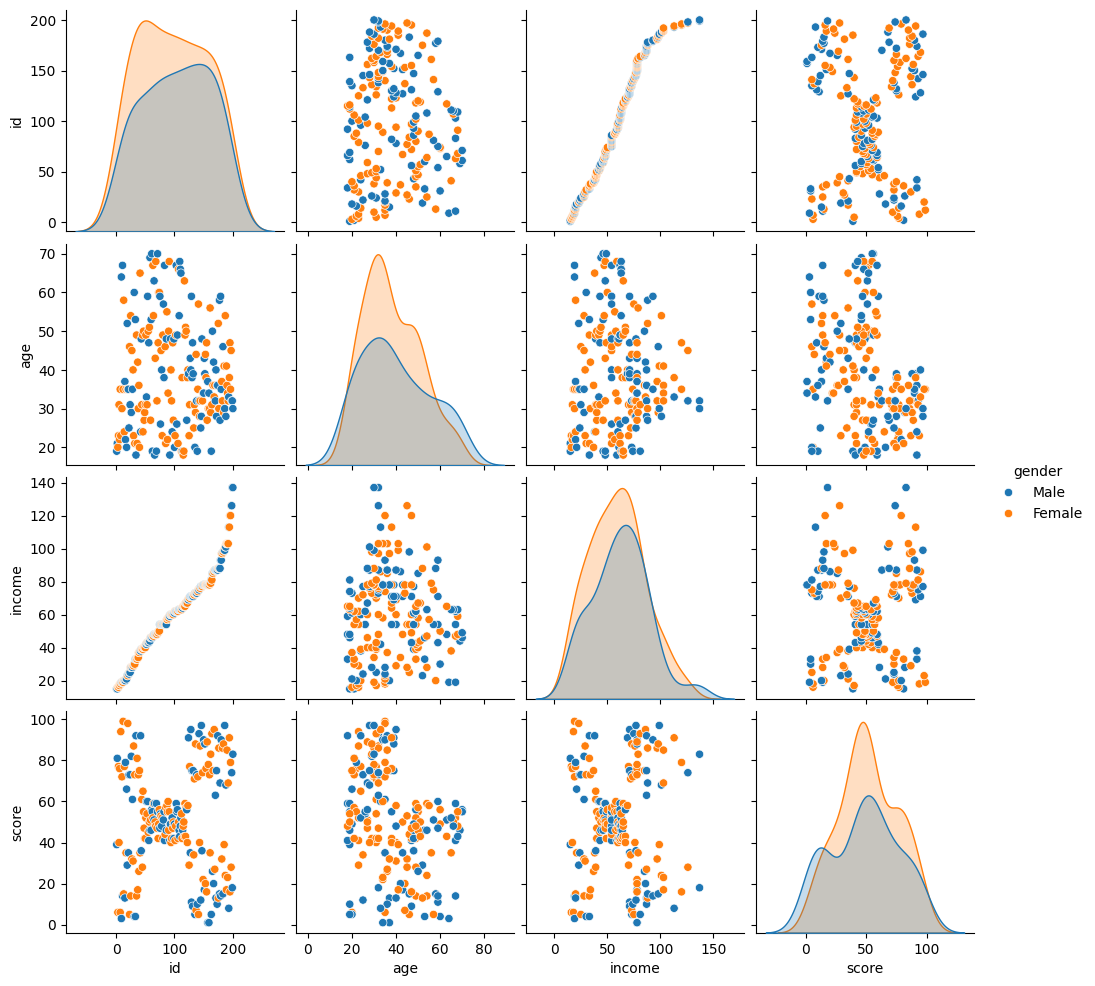

In [72]:
sns.pairplot(dados, hue = 'gender')

In [73]:
dados_modelagem = dados.copy()
dados_modelagem.drop('id', axis=1, inplace=True)
dados_modelagem['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
dados_modelagem

/tmp/ipython-input-73-1610662053.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_modelagem['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
/tmp/ipython-input-73-1610662053.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_modelagem['gender'].replace({'Female': 0, 'Male': 

,gender,age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [74]:
scaler = StandardScaler()
dados_modelagem['age'] = scaler.fit_transform(dados_modelagem[['age']])
dados_modelagem['income'] = scaler.fit_transform(dados_modelagem[['income']])
dados_modelagem['score'] = scaler.fit_transform(dados_modelagem[['score']])
dados_modelagem

,gender,age,income,score
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


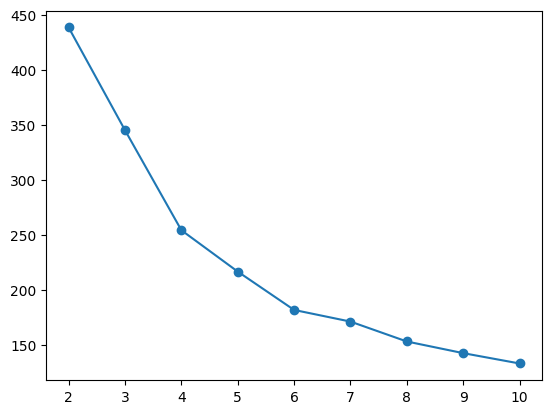

In [76]:
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dados_modelagem)
    wcss.append(kmeans.inertia_)


plt.plot(range(2, 11), wcss , 'o-')

In [79]:
modelo_kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
modelo_kmeans.fit(dados_modelagem)

clusters = modelo_kmeans.labels_
dados_modelagem['cluster'] = clusters
dados['cluster'] = clusters

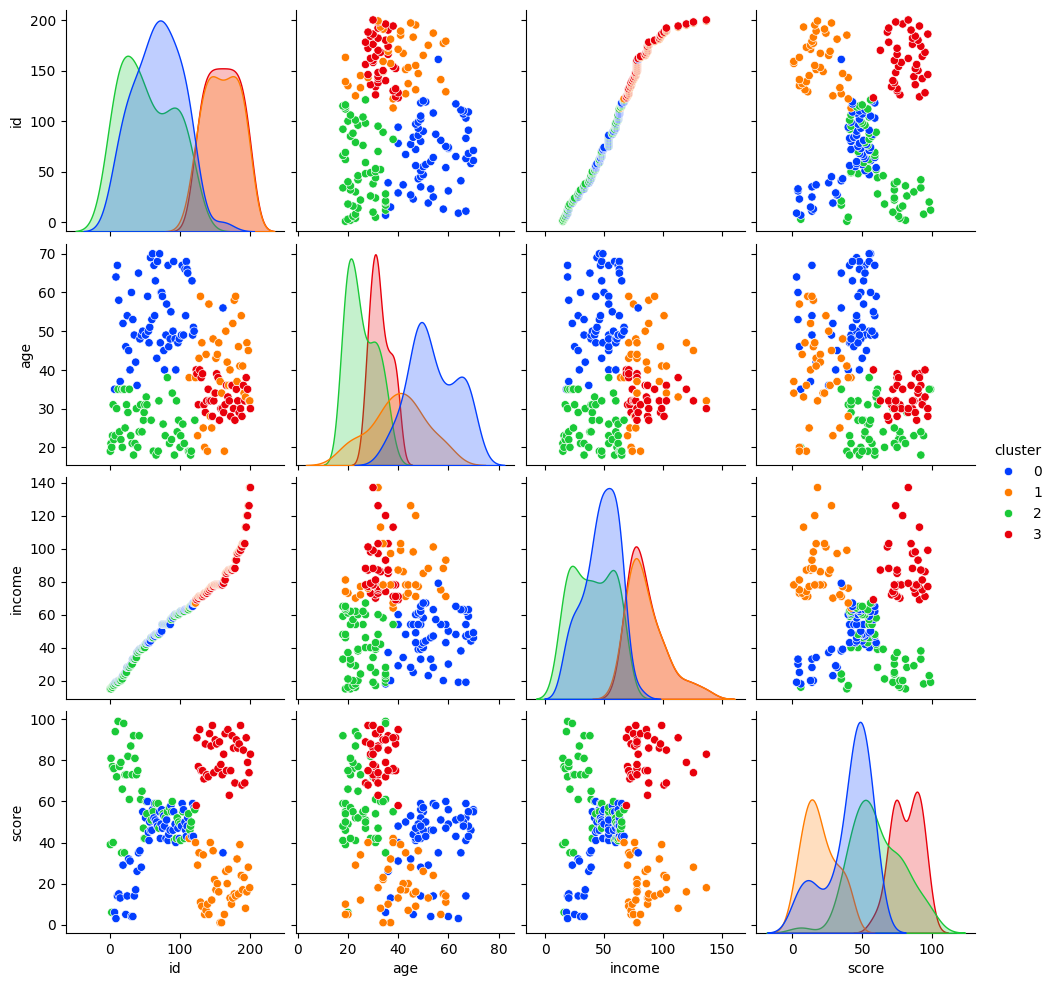

In [82]:
sns.pairplot(dados, hue='cluster', palette='bright')

In [88]:
fig = px.box(dados, y='score', color='cluster', template='simple_white')
fig.update_layout(title_text='Score por Cluster', width=600)
fig.show()

In [89]:
fig = px.box(dados, y='age', color='cluster', template='simple_white')
fig.update_layout(title_text='Idade por Cluster', width=600)
fig.show()

In [94]:
dados.columns

Index(['id', 'gender', 'age', 'income', 'score', 'cluster'], dtype='object')

In [96]:
fig = px.box(dados, y='income', color='cluster', template='simple_white')
fig.update_layout(title_text='Renda por Cluster', width=600)
fig.show()

In [99]:
fig = px.scatter(dados, x='income', y='score', color='cluster', template='simple_white')
fig.update_traces(marker_size=10, line_width=1, opacity=0.7)
fig.update_layout(title_text='Renda x Score por Cluster', width=600)

In [107]:
fig = px.histogram(dados,  x='score', facet_col='cluster', color='gender', template='simple_white')
fig.update_layout(title_text='Renda x Score por Cluster', width=900)

In [114]:
dados['si_ratio'] = dados['score'] / dados['income']
avg_si = dados['si_ratio'].mean()

fig = px.strip(dados, y='si_ratio', color='cluster', template='simple_white')
fig.add_hline(y=avg_si, line_width=2, line_dash='dash', line_color='black')
fig.update_layout(title_text='Score/Renda por Cluster', width=600)
fig.update_traces(marker={'size': 10, 'opacity': 0.7})
fig.show()

In [118]:
correlacao = dados_modelagem.corr(method='spearman')
fig = px.imshow(correlacao, text_auto=True, color_continuous_scale='RdBu_r')
fig.show()

In [123]:
dados.select_dtypes(include='number').groupby('cluster').median().style.background_gradient(cmap='Blues')

,id,age,income,score,si_ratio
cluster,,,,,
0,69.500000,51.500000,48.500000,46.000000,0.854497
1,159.000000,41.000000,78.000000,17.000000,0.170455
2,48.000000,24.000000,40.000000,56.000000,1.255814
3,161.000000,32.000000,78.500000,83.000000,0.978535
